<a href="https://colab.research.google.com/github/SAQR-CA/SAQR-CA/blob/main/Python_for_Data_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Analysis and RFM analysis
The Olist Store public dataset on Kaggle contains purchase information from Brazilian online shoppers. The collection includes details on 100,000 orders placed across many Brazilian marketplaces between 2016 and 2018. Answer the following questions based on your data analysis:

How the customers are geographically distributed?
What are the actual differences between the estimated delivery and actual delivery status?
Which season of the year that customers make high purchases?
How are the Recency, Monitory, and Frequency of customers?

**data source**: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce

Import libraries

In [ ]:
!pip install matplotlib-venn
!apt-get -qq install -y libfluidsynth1

E: Package 'libfluidsynth1' has no installation candidate


In [ ]:
!apt-get -qq install -y graphviz && pip install pydot
import pydot

In [ ]:
!pip install cartopy
import cartopy

In [ ]:
!pip install unidecode #module used for converting Unicode text into its closest ASCII representation,
import unidecode

In [ ]:
import pandas as pd #  bring the data analysis library into current environment.
import seaborn as sns # library's functionality for data visualization, customizing aesthics, and statistical plotting
import matplotlib.pyplot as plt # library's functionality for creating various types of plots, visualizations, subplots, and saving figures
import matplotlib.image as mpimg #provide a necessary tools for loading, displaying, and manipulating image
import datetime
import numpy as np # open-source numerical Python library, contains a multi-dimensional array & matrix data structures. It can be utilised to perform a number of mathematical operations on arrays such as trigonometric, statistical, & algebraic routines.
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

Connected to Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
customers = pd.read_csv('/content/drive/My Drive/olist_ds/olist_customers_dataset.csv')
geolocation = pd.read_csv('/content/drive/My Drive/olist_ds/olist_geolocation_dataset.csv')
orders = pd.read_csv('/content/drive/My Drive/olist_ds/olist_orders_dataset.csv')
order_items = pd.read_csv('/content/drive/My Drive/olist_ds/olist_order_items_dataset.csv')
products = pd.read_csv('/content/drive/My Drive/olist_ds/olist_products_dataset.csv')
payments = pd.read_csv('/content/drive/My Drive/olist_ds/olist_order_payments_dataset.csv')
sellers = pd.read_csv('/content/drive/My Drive/olist_ds/olist_sellers_dataset.csv')
reviews = pd.read_csv('/content/drive/My Drive/olist_ds/olist_order_reviews_dataset.csv')
product_category_name = pd.read_csv('/content/drive/My Drive/olist_ds/product_category_name_translation.csv')

Data quality assessment

1- Customers dataFrame

In [ ]:
customers.sample(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
2158,77cd9974fb0d6d686e5f69e13b621419,1b9d809f6e14eaa16075435fff033fb5,4139,sao paulo,SP
50296,b2a682e0a1f89cff5840ed5838888bba,e0a1aa604ed61564997b8d69144e415b,13820,jaguariuna,SP
94902,5001b83bab940e176455b5f3d9d00c74,bbadc1cb33cdfff8e617a37e7574ff92,74775,goiania,GO
11699,8f8b7a582620f3717c11fde831e8860d,ccaa4c1ebd356bfa3df7b0398fdbf04b,83900,sao mateus do sul,PR
21613,c41a39d44789dfa58ded86a11abfc320,04a24732681955f5daf4c435f5025743,58770,coremas,PB
12674,9a6c7184233793dc64cdabfcc7120b83,65db6dcd7ff3b3930cef912ad7d9c900,18120,mairinque,SP
5636,c93967bb7502dedcb3d9872a427ea429,e90461ad4c3d9b2f8ad63c57200c1c0c,38706,patos de minas,MG
54430,41098815d7b37701fd86f172aa473842,ce6fe00734c727c4543c7191f68d1ca0,4185,sao paulo,SP
59308,a753155288fad08f8802c3b2d2b243df,7c0e2a8adb00075cb0e0bbc19175c878,73105,brasilia,DF
10489,b65df387ccc9a5adb98b8b5773e18748,169375136c23aee8fcf19cc4f69a38ed,39625,itaobim,MG


In [ ]:
customers.isna().mean() #checking missing value, null, Nan, etc., for each column for customers dataframe

customer_id                 0.0
customer_unique_id          0.0
customer_zip_code_prefix    0.0
customer_city               0.0
customer_state              0.0
dtype: float64

In [ ]:
customers.groupby('customer_unique_id').size().sort_values(ascending=False) #checking the dublication for each unique customer appears in the dataframe

customer_unique_id
8d50f5eadf50201ccdcedfb9e2ac8455    17
3e43e6105506432c953e165fb2acf44c     9
6469f99c1f9dfae7733b25662e7f1782     7
ca77025e7201e3b30c44b472ff346268     7
1b6c7548a2a1f9037c1fd3ddfed95f33     7
                                    ..
5657dfebff5868c4dc7e8355fea865c4     1
5657596addb4d7b07b32cd330614bdf8     1
5656eb169546146caeab56c3ffc3d268     1
5656a8fabc8629ff96b2bc14f8c09a27     1
ffffd2657e2aad2907e67c3e9daecbeb     1
Length: 96096, dtype: int64

2- Geolocation dataframe

In [ ]:
geolocation.sample(10)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
393967,18650,-22.732834,-48.553888,sao manuel,SP
316763,13615,-22.171286,-47.379071,leme,SP
507554,27524,-22.473913,-44.479304,resende,RJ
98944,4615,-23.623973,-46.666191,sao paulo,SP
833657,79052,-20.503109,-54.585759,campo grande,MS
148665,6080,-23.541680,-46.781992,osasco,SP
532140,29153,-20.309066,-40.364857,cariacica,ES
578460,33145,-19.772502,-43.927695,santa luzia,MG
132365,5574,-23.590582,-46.802360,sao paulo,SP
320472,13830,-22.602733,-46.912095,santo antonio de posse,SP


In [ ]:
geolocation.isna().mean()

geolocation_zip_code_prefix    0.0
geolocation_lat                0.0
geolocation_lng                0.0
geolocation_city               0.0
geolocation_state              0.0
dtype: float64

In [ ]:
geolocation['geolocation_city'].unique()

array(['sao paulo', 'são paulo', 'sao bernardo do campo', ..., 'ciríaco',
       'estação', 'vila lângaro'], dtype=object)

There are duplicates of the city with accents in the names.

In [ ]:
def pretty_string(column):
    column_space = ' '.join(column.split())
    return unidecode.unidecode(column_space.lower())

In [ ]:
geolocation.groupby('geolocation_zip_code_prefix').size().sort_values(ascending=False)

geolocation_zip_code_prefix
24220    1146
24230    1102
38400     965
35500     907
11680     879
         ... 
20056       1
76370       1
63012       1
76372       1
32635       1
Length: 19015, dtype: int64

there is the same zip code prefix with more than 1 location. This problem may have occurred because only the zip code prefix was kept. To solve this problem will use the median value of the latitude and longitude of each point

In [ ]:
geolocation[geolocation['geolocation_zip_code_prefix'] == 24220].head()


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
470805,24220,-22.905817,-43.106989,niteroi,RJ
470811,24220,-22.902306,-43.112545,niteroi,RJ
470812,24220,-22.904567,-43.110491,niteroi,RJ
470820,24220,-22.902575,-43.109192,niteroi,RJ
470821,24220,-22.907500,-43.106170,niteroi,RJ


There are zip codes with two or more states. To solve this problem, count the states by zip code and use the majority state for this zip code.

In [ ]:
other_state_geolocation = geolocation.groupby(['geolocation_zip_code_prefix'])['geolocation_state'].nunique().reset_index(name='count') # grouping the geolocation and count the number of unique value
other_state_geolocation[other_state_geolocation['count']>= 2].shape # filternig geolocation sate
max_state = geolocation.groupby(['geolocation_zip_code_prefix','geolocation_state']).size().reset_index(name='count').drop_duplicates(subset = 'geolocation_zip_code_prefix').drop('count',axis=1)

In [ ]:
geolocation_silver = geolocation.groupby(['geolocation_zip_code_prefix','geolocation_city','geolocation_state'])[['geolocation_lat','geolocation_lng']].median().reset_index()
geolocation_silver = geolocation_silver.merge(max_state,on=['geolocation_zip_code_prefix','geolocation_state'],how='inner')

In [ ]:
customers_silver = customers.merge(geolocation_silver,left_on='customer_zip_code_prefix',right_on='geolocation_zip_code_prefix',how='inner')
customers_silver

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_city,geolocation_state,geolocation_lat,geolocation_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409,franca,SP,-20.502070,-47.396822
1,5dca924cc99eea2dc5ba40d11ec5dd0f,2761fee7f378f0a8d7682d8a3fa07ab1,14409,franca,SP,14409,franca,SP,-20.502070,-47.396822
2,661897d4968f1b59bfff74c7eb2eb4fc,d06a495406b79cb8203ea21cc0942f8c,14409,franca,SP,14409,franca,SP,-20.502070,-47.396822
3,702b62324327ccba20f1be3465426437,8b3d988f330c1d1c3332ccd440c147b7,14409,franca,SP,14409,franca,SP,-20.502070,-47.396822
4,bdf997bae7ca819b0415f5174d6b4302,866755e25db620f8d7e81b351a15bb2f,14409,franca,SP,14409,franca,SP,-20.502070,-47.396822
...,...,...,...,...,...,...,...,...,...,...
148538,ff6b440b2465bfaef05c675efb48cd15,e38a27b979a552e019e297ecc22dc67b,98860,eugenio de castro,RS,98860,eugenio de castro,RS,-28.526971,-54.145383
148539,3f7029d9b98a47370cd5f3a97adcbccd,5894d202cc869b4ec460fce3c6ed8cb5,5538,sao paulo,SP,5538,sao paulo,SP,-23.588504,-46.737870
148540,d9110683c7a282144e9fc97660026a28,5cbfdb85ec130898108b32c50d619c39,74980,aparecida de goiania,GO,74980,aparecida de goiania,GO,-16.822945,-49.244615
148541,d9110683c7a282144e9fc97660026a28,5cbfdb85ec130898108b32c50d619c39,74980,aparecida de goiania,GO,74980,aparecida de goiânia,GO,-16.823261,-49.247368


In [ ]:
def plot_brasil_map(data):
    brazil = mpimg.imread(urllib.request.urlopen('https://i.pinimg.com/originals/3a/0c/e1/3a0ce18b3c842748c255bc0aa445ad41.jpg'),'jpg')
    ax = data.plot(kind="scatter", x="geolocation_lng", y="geolocation_lat", figsize=(10,10), alpha=0.3,s=0.3,c='blue')
    plt.axis('off')
    plt.imshow(brazil, extent=[-73.98283055, -33.8,-33.75116944,5.4])
    plt.show()

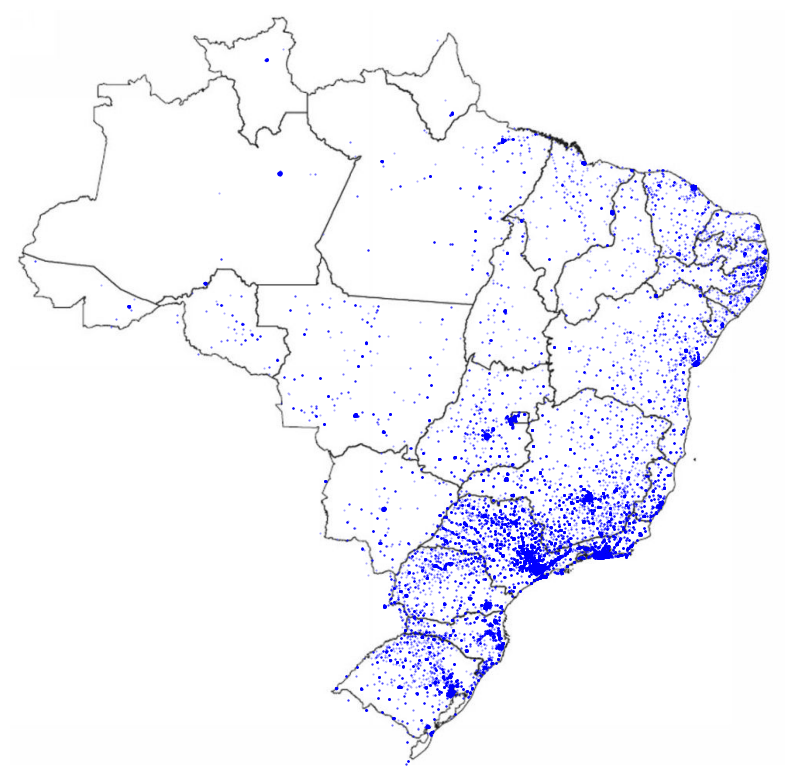

In [ ]:
plot_brasil_map(customers_silver.drop_duplicates(subset='customer_unique_id'))

As we can see, there are more customers in the southeast and south of the country. Other information, there are more customers in cities that are capitals (São Paulo, Rio de Janeiro, Porto Alegre and otheres).

3- Orders

In [ ]:
order_items.sample(10)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
632,0176d7e16d1bd14cde42d9d3a24e525b,1,7088744b00831b410bd17716cb578f39,c1ed9e3daf6154542826a6996af0fb8c,2017-08-21 22:55:19,35.00,16.11
19454,2ca8cb6bbc44be38933576d3355ab023,1,34eb0685663d60e57a9ca086c8e33423,048c2757535328e0d7dac690ad3c0aae,2018-01-05 14:46:38,199.70,18.65
23041,34a114524c5f794047b202c0c85f3a17,1,1003992d2a8d1e7f870643148854ddc7,d91fb3b7d041e83b64a00a3edfb37e4f,2018-07-25 10:35:21,71.95,13.16
89760,cbe1915d69c3828d0f5ab98b44fb8a99,1,3a12fe499b9342f78cb827ee18393e7f,1900267e848ceeba8fa32d80c1a5f5a8,2017-06-15 17:33:21,39.99,16.11
68912,9d6467a1178784a5748e266e3425c170,5,a29c32ba19cb3a3a0a8184fd9f8cb6b7,0aa2205ca24f113f4658a5c536667426,2018-04-27 02:15:17,31.99,16.32
99975,e2bacfc6a86c742ba0f3a6e1f9df13dd,1,ccbbe3645167596bb592b1401c72c20c,15b3b1b81484422eb41df68ac87f1f50,2018-01-30 02:39:34,35.00,11.85
51455,7509453843e932c3120d2e3c8bc4563d,1,3a6b0b915f453650a8ff32d7872dbd6d,b2ba3715d723d245138f291a6fe42594,2018-06-22 17:21:06,89.90,34.84
79696,b544e719948795192f13772cc29b6316,1,b19f31153ada341c1bb333ce98063562,dee656f0f566ed1aa85bd137c943f08f,2017-11-21 17:55:34,26.99,11.85
84521,c0064eb733991511a78ddc2fdba0effe,1,5135301d684848b74276f22afcc6781c,7722b1df1b0e383e000397b2c11e3e19,2018-07-06 11:31:18,49.90,9.10
4671,0a8b3b277ffe67981af7d4a14e7f98d5,1,0c71252f37443403376d2008034a7240,70c27847eca8195c983ed7e798c56743,2018-06-20 07:17:55,108.90,13.50


In [ ]:
order_items.isna().mean()

order_id               0.0
order_item_id          0.0
product_id             0.0
seller_id              0.0
shipping_limit_date    0.0
price                  0.0
freight_value          0.0
dtype: float64

In [ ]:
order_items.groupby('order_id').size().sort_values(ascending=False)

order_id
8272b63d03f5f79c56e9e4120aec44ef    21
1b15974a0141d54e36626dca3fdc731a    20
ab14fdcfbe524636d65ee38360e22ce8    20
9ef13efd6949e4573a18964dd1bbe7f5    15
428a2f660dc84138d969ccd69a0ab6d5    15
                                    ..
5a0911d70c1f85d3bed0df1bf693a6dd     1
5a082b558a3798d3e36d93bfa8ca1eae     1
5a07264682e0b8fbb3f166edbbffc6e8     1
5a071192a28951b76774e5a760c8c9b7     1
fffe41c64501cc87c801fd61db3f6244     1
Length: 98666, dtype: int64

each order can have more than one product.
Since I have more than 1 product per order, I need to sum the price and the shipping value and get the maximum value of the shipping_limit_date for analysis.

In [ ]:
order_items_silver = order_items.groupby('order_id').agg({'price':sum,'freight_value':sum,'shipping_limit_date':max }).reset_index()

 there are some outliers. how come the shipping is over $ 500, which order costs over USD4000

<Axes: xlabel='price', ylabel='freight_value'>

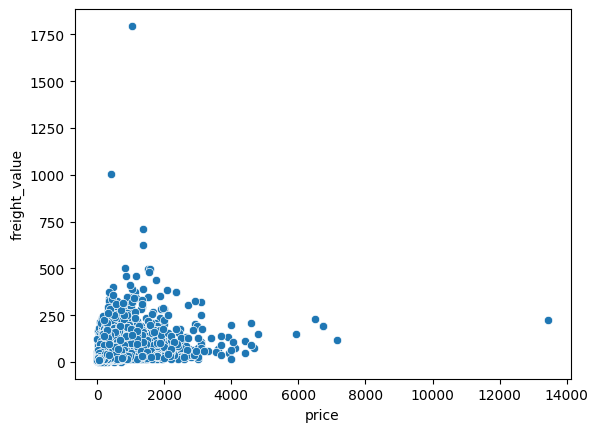

In [ ]:
sns.scatterplot(x='price',y='freight_value',data=order_items_silver)

In [ ]:
order_items_silver.describe()

,price,freight_value
count,98666.000000,98666.000000
mean,137.754076,22.823562
std,210.645145,21.650909
min,0.850000,0.000000
25%,45.900000,13.850000
50%,86.900000,17.170000
75%,149.900000,24.040000
max,13440.000000,1794.960000


In [ ]:
percentil_freight_value = order_items_silver['freight_value'].quantile(0.99)
order_items_silver = order_items_silver[(order_items_silver['price'] <= 5000) & (order_items_silver['freight_value'] <= percentil_freight_value)]

In [ ]:
order_items_silver

,order_id,price,freight_value,shipping_limit_date
0,00010242fe8c5a6d1ba2dd792cb16214,58.90,13.29,2017-09-19 09:45:35
1,00018f77f2f0320c557190d7a144bdd3,239.90,19.93,2017-05-03 11:05:13
2,000229ec398224ef6ca0657da4fc703e,199.00,17.87,2018-01-18 14:48:30
3,00024acbcdf0a6daa1e931b038114c75,12.99,12.79,2018-08-15 10:10:18
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90,18.14,2017-02-13 13:57:51
...,...,...,...,...
98661,fffc94f6ce00a00581880bf54a75a037,299.99,43.41,2018-05-02 04:11:01
98662,fffcd46ef2263f404302a634eb57f7eb,350.00,36.53,2018-07-20 04:31:48
98663,fffce4705a9662cd70adb13d4a31832d,99.90,16.95,2017-10-30 17:14:25
98664,fffe18544ffabc95dfada21779c9644f,55.99,8.72,2017-08-21 00:04:32


In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [ ]:
columns_timestamp = ['order_purchase_timestamp','order_approved_at',
                     'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
for column in columns_timestamp:
    orders[column] = pd.to_datetime(orders[column])

In [ ]:
orders['diff_delivery_days'] = (orders['order_estimated_delivery_date'] - orders['order_delivered_customer_date']).dt.days
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,diff_delivery_days
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,5.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,17.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,12.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,9.0
...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,10.0
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,1.0
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,5.0
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,20.0


In [ ]:
orders.groupby(orders['diff_delivery_days'] < 0).size()

diff_delivery_days
False    91614
True      7827
dtype: int64

count    96476.000000
mean        10.876881
std         10.183854
min       -189.000000
25%          6.000000
50%         11.000000
75%         16.000000
max        146.000000
Name: diff_delivery_days, dtype: float64


<Axes: xlabel='diff_delivery_days', ylabel='Count'>

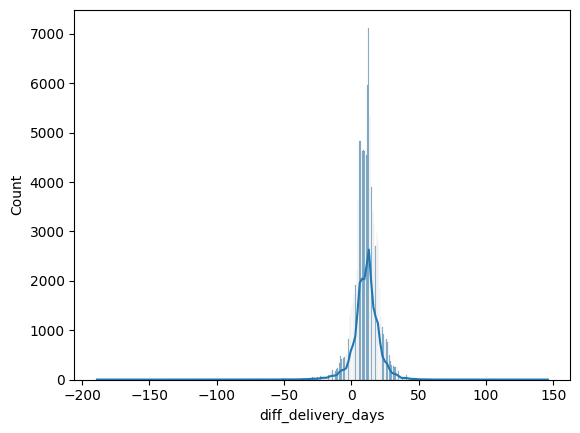

In [ ]:
print(orders['diff_delivery_days'].describe())
sns.histplot(x='diff_delivery_days', data=orders, kde=True) #create a histogram for the 'diff_delivery_days', kds: kernal density estimate plot to the histogram for smoother representation

 the average difference between the estimated delivery and the actual delivery is 10 days, which is a bit high.

add condition that the 'diff_delivery_days' column values should be greater than the minimum value in the 'diff_delivery_days' column and less than the maximum value in the 'diff_delivery_days' column. This essentially selects the rows in the DataFrame where 'diff_delivery_days'fall within the range defined by the minimum and maximum values in that column.

In [ ]:
orders[(orders['diff_delivery_days'] > min(orders['diff_delivery_days'])) & (orders['diff_delivery_days'] < max(orders['diff_delivery_days'])) ]


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,diff_delivery_days
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,5.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,17.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,12.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,9.0
...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,10.0
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,1.0
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,5.0
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,20.0


In [ ]:
orders_silver = orders.merge(order_items_silver,on='order_id',how='inner')

In [ ]:
def plot_ts_decompose(decompose,figsize=(12,8)):
    fig, ax = plt.subplots(4,1,figsize=figsize)
    sns.lineplot(data=decompose.observed,x=decompose.observed.index,y=decompose.observed,ax=ax[0])
    sns.lineplot(data=decompose.trend,x=decompose.trend.index,y=decompose.trend,ax=ax[1])
    sns.lineplot(data=decompose.seasonal,x=decompose.seasonal.index,y=decompose.seasonal,ax=ax[2])
    sns.lineplot(data=decompose.resid,x=decompose.resid.index,y=decompose.resid,ax=ax[3])
    plt.tight_layout()

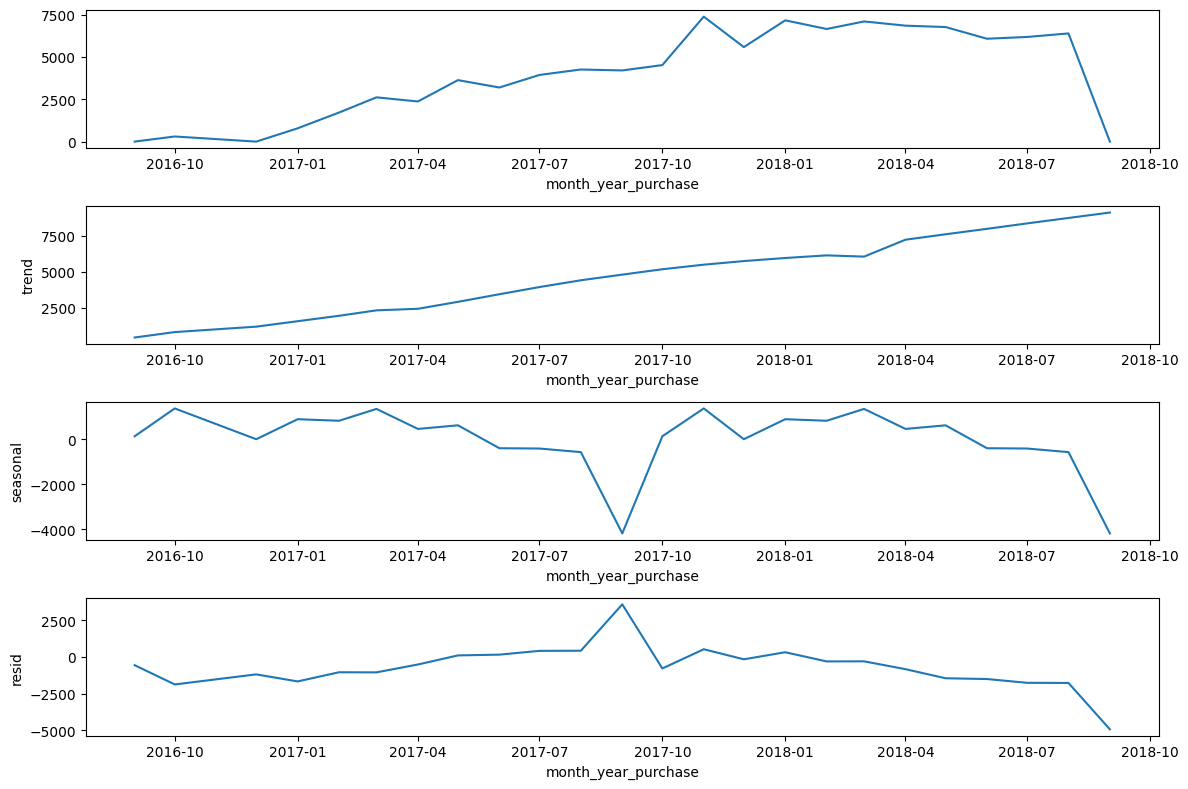

In [ ]:
orders_silver['month_year_purchase'] = orders_silver['order_purchase_timestamp'].dt.to_period('M')
order_purchase_timestamp = orders_silver.groupby('month_year_purchase').size()
order_purchase_timestamp.index = order_purchase_timestamp.index.astype('datetime64[ns]')

decompose = seasonal_decompose(order_purchase_timestamp,model='additive',period=12, extrapolate_trend=12)
plot_ts_decompose(decompose)

 there is a seasonality in the series in which in the months of December there is a drop in the purchase of products and in the months of January, March, and May there is an increase.

In [ ]:
orders_customers = customers.merge(orders_silver, on='customer_id', how='inner')

In [ ]:
max_date = max(orders_customers['order_purchase_timestamp']) + datetime.timedelta(days=1)

In [ ]:
rfm_data = orders_customers.groupby('customer_unique_id').agg({
    'order_purchase_timestamp': lambda x: (max_date - x.max()).days,
    'customer_id':'count',
    'price':'sum'
}).reset_index()
rfm_data.columns =['customer_id','recency','frequency','monetary']

Note that the frequency of customers is the big problem for the classification, because only 3% of customers made more than one purchase but is something that's very common in ecommerce.

0.03034247735162137
count    94488.000000
mean         1.033771
std          0.210110
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         16.000000
Name: frequency, dtype: float64


<Axes: xlabel='frequency', ylabel='Count'>

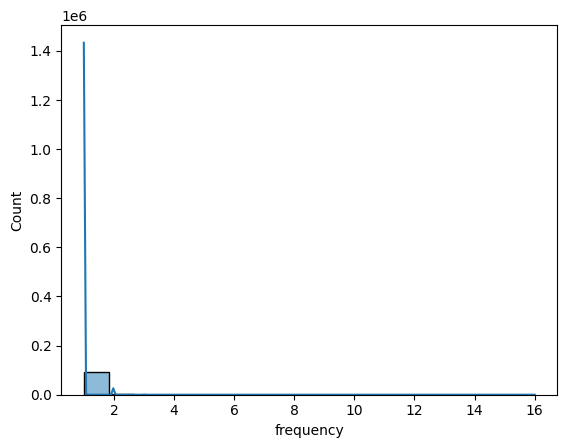

In [ ]:
print(rfm_data[rfm_data['frequency']>1].shape[0] / rfm_data.shape[0])
print(rfm_data['frequency'].describe())
sns.histplot(x='frequency', data=rfm_data, kde=True)

An average monetary customer is  USD 136, and 75 percent of the customers spend less than USD 150 and the maximum was  USD 4690.

count    94488.000000
mean       136.506113
std        190.946953
min          0.850000
25%         47.000000
50%         89.000000
75%        150.000000
max       4690.000000
Name: monetary, dtype: float64


<Axes: xlabel='monetary', ylabel='Count'>

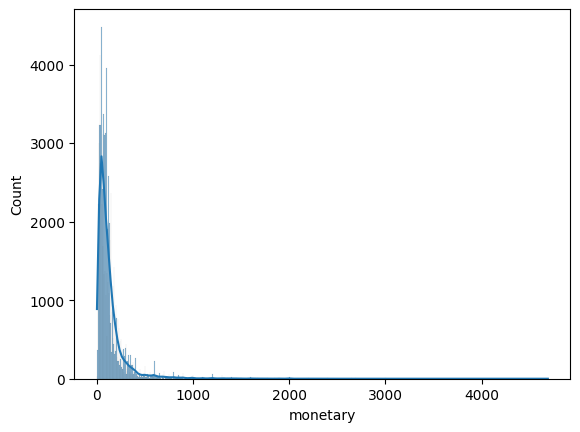

In [ ]:
print(rfm_data['monetary'].describe())
sns.histplot(x='monetary', data=rfm_data, kde=True)

As we can see the 25% of customers have a recency of 3.9 months with an average of 8 months. With a purchase frequency equivalent to 1 and with this recency this indicates that customers make very specific purchases.

count    94488.000000
mean       243.851198
std        153.165787
min          1.000000
25%        120.000000
50%        224.000000
75%        353.000000
max        729.000000
Name: recency, dtype: float64


<Axes: xlabel='recency', ylabel='Count'>

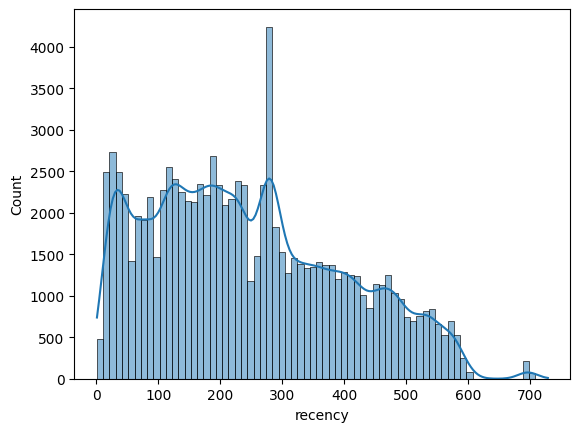

In [ ]:
print(rfm_data['recency'].describe())
sns.histplot(x='recency', data=rfm_data, kde=True)

**Conclusions**:

1- There are more customers in the southeast and south of the country. Other information: there are more customers in cities that are capitals (São Paulo, Rio de Janeiro, Porto Alegre, and others);

2- The average order price is USD 132, and 50% of orders cost less than USD 85. The average freight value is USD 21.41, and 50% of the orders have a freight value of USD 17.

3- The delivery date needs to be revised because the average difference between estimated and actual delivery is 10 days, which is a bit high. Another fact is that only 7.81% of the actual delivery was lower than the estimated delivery.

4- There is a seasonal buying series in which in the months of December there is a drop in the purchase of products, and in the months of January, March, and May there is an increase.

5- Only 3% of customers made more than one purchase.

6-25% of customers have a recency of 3.9 months, with an average of 8 months. With a purchase frequency equivalent to 1, this indicates that customers make very specific purchases.